### 결정 트리

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from sklearn.model_selection import train_test_split
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [2]:
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier

X, y = make_moons(n_samples=100, noise=0.25, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.960


In [3]:
# 깊이 제한
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도 : 0.960
테스트 세트 정확도 : 0.920


#### - 과대적합을 방지하기 위해 트리의 최대 깊이를 4로 제한했다.
#### - 훈련 세트의 정확도가 떨어지면서 테스트 세트의 정확도도 떨어졌다.
#### - 최대 깊이를 제한함으로써 일반화가 진행된 것을 알 수 있다.

#### Cancer 데이터

In [6]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   stratify=cancer.target, random_state=42)
print("X_train..shape: {}".format(X_train.shape), "X_test.shape: {}".format(X_test.shape))

for max_depth in [1, 4, 8]:
    tree = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    tree.fit(X_train, y_train)
    print("\nmax_depth : {}".format(max_depth))
    print("훈련 세트 정확도 : {:.3f}".format(tree.score(X_train, y_train)))
    print("테스트 세트 정확도 : {:.3f}".format(tree.score(X_test, y_test)))

X_train..shape: (426, 30) X_test.shape: (143, 30)

max_depth : 1
훈련 세트 정확도 : 0.923
테스트 세트 정확도 : 0.923

max_depth : 4
훈련 세트 정확도 : 0.988
테스트 세트 정확도 : 0.951

max_depth : 8
훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.937


#### - 깊이 제한에 따라 정확도가 달라지는 모습
#### - 적절한 수로 깊이 제한을 조정할 필요가 있다.

#### 결정 트리 회귀

ram_prices.shape : (333, 3)
ram_prices.keys : Index(['Unnamed: 0', 'date', 'price'], dtype='object')
   Unnamed: 0    date        price
0           0  1957.0  411041792.0
1           1  1959.0   67947725.0
2           2  1960.0    5242880.0
3           3  1965.0    2642412.0
4           4  1970.0     734003.0


Text(0, 0.5, '가격 ($/MB)')

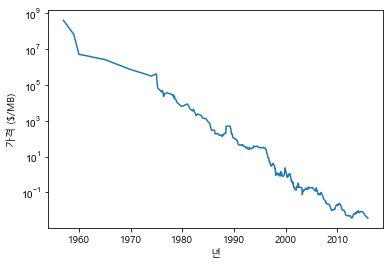

In [8]:
import os

# 컴퓨터 메모리 가격 동향
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

print("ram_prices.shape : {}".format(ram_prices.shape))
print("ram_prices.keys : {}".format(ram_prices.keys()))
print("{}".format(ram_prices[:5]))

# x축 : 날짜
# y축 : 해당 년도 RAM 1MB의 가격
plt.yticks(fontname = "Arial")
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("년")
plt.ylabel("가격 ($/MB)")

#### 결정 트리 회귀 VS 선형 회귀

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# 2000년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

print("data_train.shape : {}".format(data_train.shape), "data_test.shape()".format(data_test.shape))

# 가격 예측을 위해 날짜 특성만을 이용
X_train = data_train.date[:, np.newaxis]
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# 예측은 전체 기간에 대해서 수행
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# 예측한 값의 로그 스케일을 되돌림
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

data_train.shape : (202, 3) data_test.shape()


<ipython-input-9-ab0459da6b10>:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = data_train.date[:, np.newaxis]
<ipython-input-9-ab0459da6b10>:18: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_all = ram_prices.date[:, np.newaxis]


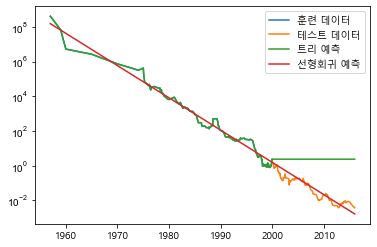

In [14]:
plt.yticks(fontname="Arial")
plt.semilogy(data_train.date, data_train.price, label="훈련 데이터")
plt.semilogy(data_test.date, data_test.price, label="테스트 데이터")
plt.semilogy(ram_prices.date, price_tree, label="트리 예측")
plt.semilogy(ram_prices.date, price_lr, label="선형회귀 예측")
plt.legend()

#### - 트리 예측 그래프는 뒤로 갈수록 부정확하다.
#### - 결정 트리 회귀는 시계열 데이터에 잘 맞지 않음을 알 수 있다.
#### - 등락 예측에는 적용이 가능하다.

#### 붓꽃 품종 분류

In [15]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, 2:]  # 꽃잎 길이와 너비
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

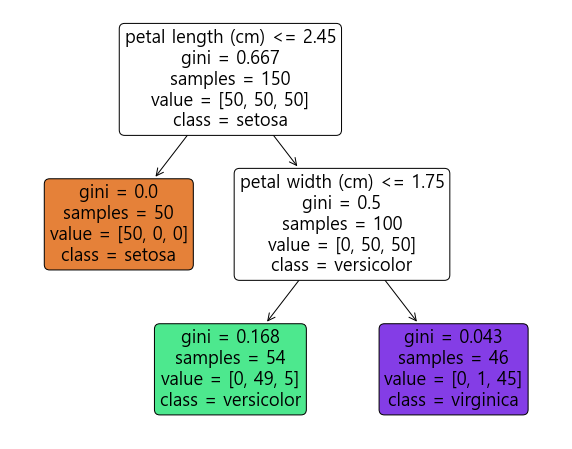

In [16]:
from sklearn.tree import plot_tree

# filled = True : 클래스 별로 색 구분
# max_depth : 출력 단계 결정
plt.figure(figsize=(10, 8))
plot_tree(tree_clf, filled=True, rounded=True, max_depth=2,
         feature_names=iris.feature_names[2:],
         class_names=iris.target_names)
plt.show()

### 랜덤 포레스트

In [18]:
from sklearn.ensemble import RandomForestClassifier

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# n_estimators : 생성할 트리의 수
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)
print("테스트 세트 정확도 : {:.3f}".format(forest.score(X_test, y_test)))

테스트 세트 정확도 : 0.920


In [22]:
forest = RandomForestClassifier(n_estimators=2, random_state=2)
forest.fit(X_train, y_train)
print("테스트 세트 정확도 : {:.3f}".format(forest.score(X_test, y_test)))

테스트 세트 정확도 : 0.880


#### - n_estimators를 2로 줄였더니 정확도도 떨어졌다.
#### - 과대적합 발생

In [27]:
forest = RandomForestClassifier(n_estimators=15, random_state=2)
forest.fit(X_train, y_train)
print("테스트 세트 정확도 : {:.3f}".format(forest.score(X_test, y_test)))

테스트 세트 정확도 : 0.880


#### - n_estimators를 15로 크게 늘렸더니 정확도가 떨어졌다.
#### - 지나치게 일반화된 것을 알 수 있다.

In [20]:
from sklearn.model_selection import cross_val_score
# cross_val_score : 일반화 성능을 측정하기 위해 데이터를 반복해서 나누고 여러 모델을 학습

cvscores = cross_val_score(forest, X, y, cv=5)
print("테스트 세트 정확도 CV = 5 : {:.3f}".format(cvscores.mean()))

cvscores = cross_val_score(forest, X, y, cv=10)
print("테스트 세트 정확도 CV = 10 : {:.3f}".format(cvscores.mean()))

테스트 세트 정확도 CV = 5 : 0.860
테스트 세트 정확도 CV = 10 : 0.840


#### - 지나치게 많은 모델을 학습하면 일반화가 되어서 정확도가 떨어진다.